Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy
from scipy.stats import spearmanr
import statistics
from datetime import timedelta
import warnings
warnings.simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Importing the Dataset

In [2]:
data = pd.read_csv('/content/Amazon Customer Behavior Survey.csv')

First 5 rows

In [3]:
data.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


Last 5 rows

In [4]:
data.tail()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy
601,2023/06/16 9:16:05 AM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Multiple times a day,Keyword,Multiple pages,3,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,3,Product recommendations,Product quality and accuracy


Rows and Columns

In [5]:
data.shape

(602, 23)

Info about Dataframe

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

Description of the Dataframe

In [7]:
data.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


Features of the Dataframe

In [9]:
print("Feature of the data ---> \n" ,tuple(data.columns))

Feature of the data ---> 
 ('Timestamp', 'age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Customer_Reviews_Importance', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas')


DATA CLEANING

Check for Null Values

In [11]:
data.isnull().sum()

,0
Timestamp,0
age,0
Gender,0
Purchase_Frequency,0
Purchase_Categories,0
Personalized_Recommendation_Frequency,0
Browsing_Frequency,0
Product_Search_Method,2
Search_Result_Exploration,0
Customer_Reviews_Importance,0


Replacing the null values

In [12]:
data['Product_Search_Method'].fillna('Unknown', inplace=True)

In [13]:
data.isnull().sum().sum()

0

Check for Duplicate Values

In [14]:
data.duplicated().sum()

0

Rename the first "Personalized_Recommendation_Frequency" column to "Recomendation Purchase Status"

In [15]:
data.rename(columns= {"Personalized_Recommendation_Frequency" : "Recomendation_Purchase_Status"} , inplace= True)

Replacing the "Never" value from cart_Completion_Frequency with "Data not available".

In [16]:
data.loc[data['Cart_Completion_Frequency'] == "Never" , ['Cart_Completion_Frequency']] = 'Data not Available'

Adding Date and Time columns by extracting data from Timestamp column

In [17]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp'] += timedelta(hours=5, minutes=30)
data['Date'] = data['Timestamp'].dt.strftime('%d/%m/%Y')
data['Time'] = data['Timestamp'].dt.time

Adding Age Category Column

In [18]:
def age_cat(row):
    x = row['age']
    if x < 18 :
        return 'Minor (<18)'
    elif (x > 18) & (x <= 25):
        return 'Young Adult (18-25)'
    elif (x > 25) & (x <= 40):
        return "Adult (26-40)"
    elif (x > 40) & (x <= 60) :
        return 'Middle-Aged Adult (41-60)'
    else :
        return 'Senior Citizen (>60)'
data['Age_Category'] = data.apply(age_cat , axis = 1)

Adding Time Status Column

In [19]:
def Time_cat(x):
    if 6 <= x.hour < 12:
        return 'Morning'
    elif 12 <= x.hour < 18:
        return 'Afternoon'
    elif 18 <= x.hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['Time_Status'] = data['Time'].apply(Time_cat)

Aranging columns and removing unnecessary columns of the data

In [20]:
data.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Recomendation_Purchase_Status',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'Date', 'Time', 'Age_Category', 'Time_Status'],
      dtype='object')

In [21]:
order = ['Date','Time','Time_Status','age','Age_Category','Gender', 'Purchase_Frequency','Purchase_Categories','Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration','Customer_Reviews_Importance','Add_to_Cart_Browsing', 'Cart_Completion_Frequency','Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left','Review_Reliability', 'Review_Helpfulness','Recomendation_Purchase_Status',
       'Personalized_Recommendation_Frequency ','Recommendation_Helpfulness','Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation','Improvement_Areas']

data = data[order]

Updated Rows and Columns

In [22]:
data.shape

(602, 26)

EDA

Gender Analysis using Pie chart

In [23]:
Gender = data['Gender'].value_counts().reset_index()
fig = px.pie(data_frame= Gender ,names= 'Gender' , values= 'count'  )
fig.update_layout(height = 450 , width = 600 , showlegend = True , title = "Analysis by Gender" ,title_font_size = 18 ,title_x = 0.5)
fig.show()

Majority of purchase - FEMALE

In [24]:
Male = data.loc[data['Gender'] == 'Male',"Purchase_Categories"].value_counts().reset_index()
Female = data.loc[data['Gender'] == 'Female', 'Purchase_Categories'].value_counts().reset_index()
Others = data.loc[data['Gender'] == 'Others', 'Purchase_Categories'].value_counts().reset_index()

Purchase Categories choice by Gender

In [25]:
trace_male = go.Bar(x=Male["Purchase_Categories"], y=Male["count"], name='Male', marker=dict(color='#90cff7' , line = dict(color = "black" , width = 1)))
trace_female = go.Bar(x=Female["Purchase_Categories"], y=Female["count"], name='Female', marker=dict(color='pink' , line = dict(color = "black" , width = 1)))
trace_other = go.Bar(x=Others["Purchase_Categories"], y=Others["count"], name='Others', marker=dict(color='light green' , line = dict(color = "black" , width = 1)))
layout = go.Layout(title='Purchase Categories choice by Gender',
                   xaxis=dict(title='Purchase Categories'),
                   yaxis=dict(title='Count'),
                   barmode='group')
fig = go.Figure(data=[trace_male, trace_female , trace_other], layout=layout)
fig.update_layout(height = 1000,xaxis=dict(tickangle=50)  ,title_x = 0.5)
fig.show()

Top three performing product categories-'Clothing and Fashion,' 'Beauty and Personal Care,' and 'Others.'

Male and Female Purchase Category Distribution

In [ ]:
fig_male = px.pie(data_frame=Male, names=Male['Purchase_Categories'], values=Male['count'])
fig_male.update_layout(height=450, width=500, showlegend=False, title="Male Purchase Category Distribution", title_font_size=20 , title_x = 0.5)
fig_male.update_traces(textfont=dict(size = 11))
fig_male.show()
fig_female = px.pie(data_frame=Female, names=Female['Purchase_Categories'], values=Female['count'])
fig_female.update_layout(height=450, width=500, showlegend=False, title="Female Purchase Category Distribution", title_font_size=20 , title_x = 0.5)
fig_female.update_traces(textfont=dict(size=11))
fig_female.show()

top recommended positions :
females-Beauty,
males-Clothing and Fashion.

Purchase Frequency Comparison for Males and Females

In [26]:
Purchase_M = data.loc[data['Gender'] == 'Male' , 'Purchase_Frequency' ].value_counts().reset_index()
Purchase_F = data.loc[data['Gender'] == 'Female' ,'Purchase_Frequency'].value_counts().reset_index()
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x=Purchase_M['Purchase_Frequency'], y=Purchase_M['count'], name='Male'), row=1, col=1)
fig.update_traces(marker=dict(color='  #b0e1ff  ', line=dict(color=' #56bfff ', width=2)), row=1, col=1)

fig.add_trace(go.Bar(x=Purchase_F['Purchase_Frequency'], y=Purchase_F['count'], name='Female'), row=1, col=2)
fig.update_traces(marker=dict(color=' #ffbfbf ', line=dict(color=' #ff7979 ', width=2)), row=1, col=2)

fig.update_layout(
    height=550,
    width=900,
    title_text="Purchase Frequency Comparison for Males and Females",
    font=dict(size=11),
    xaxis=dict(title_text="Purchase Frequency"),
    yaxis=dict(title_text="Count"),
    xaxis2=dict(title_text="Purchase Frequency"),
    yaxis2=dict(title_text="Count"),
    title_font_size=18 , title_x = 0.5)

fig.show()

Females are more active consumers than males.

Age and Time Segement Analysis

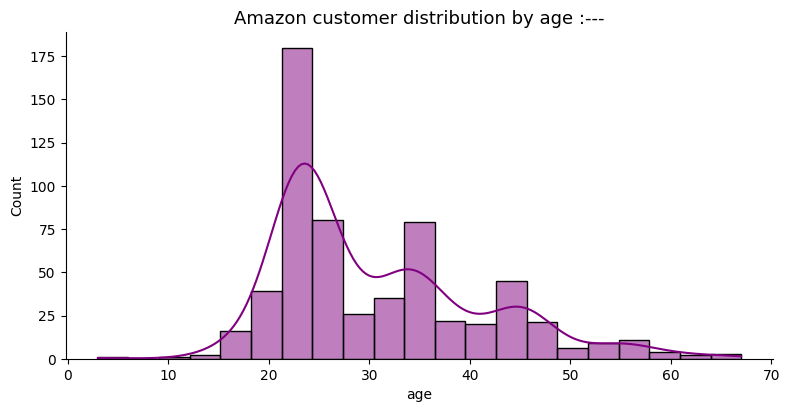

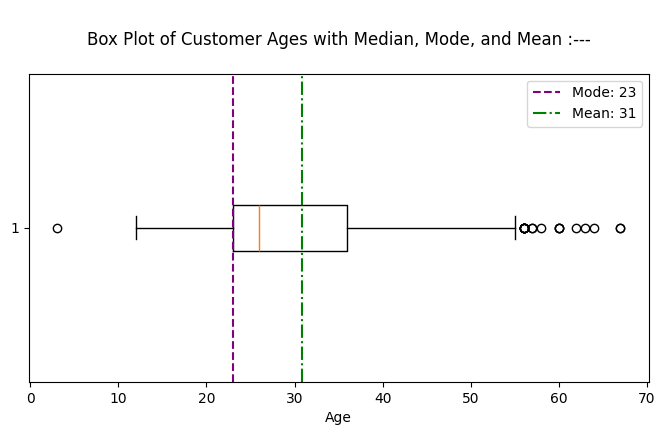

In [28]:
sns.displot(data=data, x='age', kde=True, height=4, aspect=2,color='purple')
plt.title('Amazon customer distribution by age :---' , fontsize = 13)
plt.show()
plt.figure(figsize=(8,4))
age_mode = statistics.mode(data.age)
age_mean = statistics.mean(data.age)
plt.boxplot(data.age, vert=False)
plt.axvline(x=age_mode, color='purple', linestyle='--', label=f'Mode: {age_mode}')
plt.axvline(x=age_mean, color='green', linestyle='-.', label=f'Mean: {round(age_mean)}')
plt.legend()
plt.xlabel('Age')
plt.title('\nBox Plot of Customer Ages with Median, Mode, and Mean :---\n')
plt.show()


Purchase peaked at the age of 23

Sales distribution by age category using Piechart

In [29]:
AGE = data['Age_Category'].value_counts().reset_index()
fig1 = px.pie(data_frame=AGE, names=AGE['Age_Category'], values=AGE['count'], labels=AGE['Age_Category'])
fig1.update_layout(
    height=450,
    width=600,
    showlegend=True,
    title="Sales distribution by age category",
    title_font_size=22,title_x = 0.5)
fig1.show()

Top category by age is Young Adult

In [30]:
Age_Top = data.loc[data['Age_Category'].isin (['Young Adult (18-25)','Adult (26-40)']),['Purchase_Categories','Time_Status']]

In [33]:
fig = px.histogram(data_frame=  Age_Top['Purchase_Categories'] , title= 'Top 78 % (Adult , Young Adult) coustomers choice by Purchase Categories --->')

fig.update_traces(marker=dict(line=dict(width=2, color='black')))

fig.update_layout(height = 950 , width = 1000, title_font_size = 22,
       autosize=True , xaxis=dict(tickangle=50))
fig.show()

Highest Purchased item by Adults is Clothing

Sales distribution by Time segments

In [34]:
fig = px.pie(data_frame= data['Time_Status'].value_counts().reset_index() ,names= 'Time_Status' , values= 'count',hover_name= 'Time_Status',title ='Sales distribution by Time segments --->')
fig.update_layout(height = 450 , width = 600 , title_font_size = 20 , title_x = 0.5)
fig.show()

Most Purchased Time is Night

 Rating and Review Analysis

In [35]:
print("Average rating :--", round(data['Shopping_Satisfaction'].mean() , 2))

Average rating :-- 2.46


Shopping rating distribution

In [36]:
fig = px.bar(data_frame= data['Shopping_Satisfaction'].value_counts().reset_index() , x = 'Shopping_Satisfaction' , y ='count' , title = 'Shopping rating distribution : --')
fig.update_traces(marker_color='pink')
fig.update_layout(height = 400 , width =750,plot_bgcolor = 'light blue' , title_x = 0.5)
fig.show()

Majority Rating is 3

In [40]:
print("Most given Shopping Rating given by female =",data.loc[data["Gender"] == 'Female' , 'Shopping_Satisfaction' ].mode().tolist()[-1])
print("Most given Shopping Rating given by male =",data.loc[data["Gender"] == 'Male' , 'Shopping_Satisfaction' ].mode().tolist()[-1])
print("Most given Shopping Rating given by others =",data.loc[data["Gender"] == 'Others' , 'Shopping_Satisfaction' ].mode().tolist()[:])

Most given Shopping Rating given by female = 3
Most given Shopping Rating given by male = 2
Most given Shopping Rating given by others = [2, 3]


Shopping Satisfaction by Review Reliability

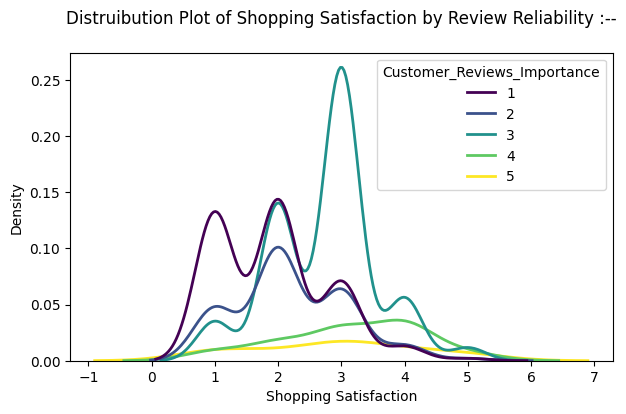

In [41]:
plt.figure(figsize=(7,4))

sns.kdeplot(data=data, x='Shopping_Satisfaction', hue='Customer_Reviews_Importance', palette="viridis",linewidth=2)

plt.title('Distruibution Plot of Shopping Satisfaction by Review Reliability :--\n')
plt.xlabel('Shopping Satisfaction')
plt.ylabel('Density')

plt.show()

Customer reviews serve as an excellent means to evaluate a product.

Heatmap between Personal Recommendation and Shopping rating

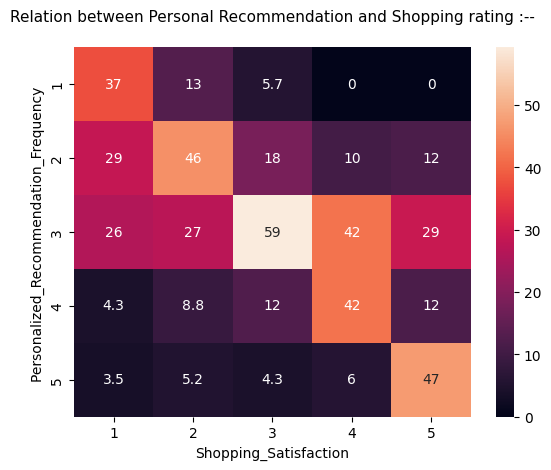

In [42]:
contingency_table = pd.crosstab(data['Personalized_Recommendation_Frequency '], data['Shopping_Satisfaction'])

contingency_table_percent = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

sns.heatmap(contingency_table_percent, annot=True)
plt.title('Relation between Personal Recommendation and Shopping rating :--\n', fontdict=dict(size=11))
plt.show()

The Heatmap highlights a strong correlation between Shopping Rating and Personalized Recommendation Frequency.

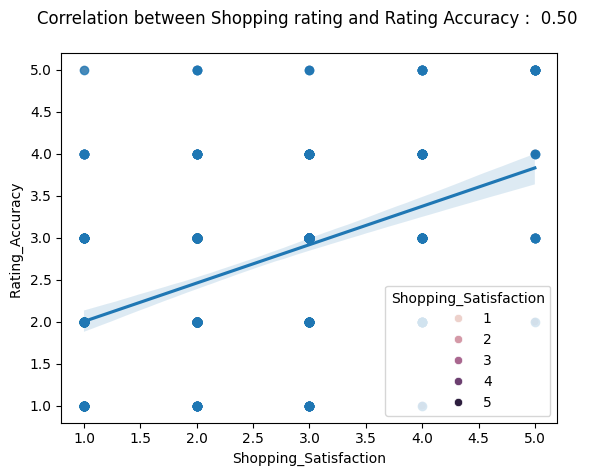

In [43]:
correlation, _ = spearmanr(data['Shopping_Satisfaction'], data['Rating_Accuracy '])
sns.scatterplot(data , x ='Shopping_Satisfaction' , y = 'Rating_Accuracy ' , hue = 'Shopping_Satisfaction' )
sns.regplot(data=data, x='Shopping_Satisfaction', y='Rating_Accuracy ' )
plt.title(f'Correlation between Shopping rating and Rating Accuracy :  {correlation:.2f} \n')
plt.show()

The Correlation implies that one increases, the other tends to rise as well.

Behavior Analysis

In [44]:
fig = px.pie(data_frame= data['Cart_Completion_Frequency'].value_counts().reset_index() , names= 'Cart_Completion_Frequency' , labels= 'Cart_Completion_Frequency',
      values= 'count' , title= "Amazon Customer's Cart Completion frequency --->")
fig.update_layout(height = 450 , width = 600)
fig.show()

More than half of customers complete their carts sometimes.

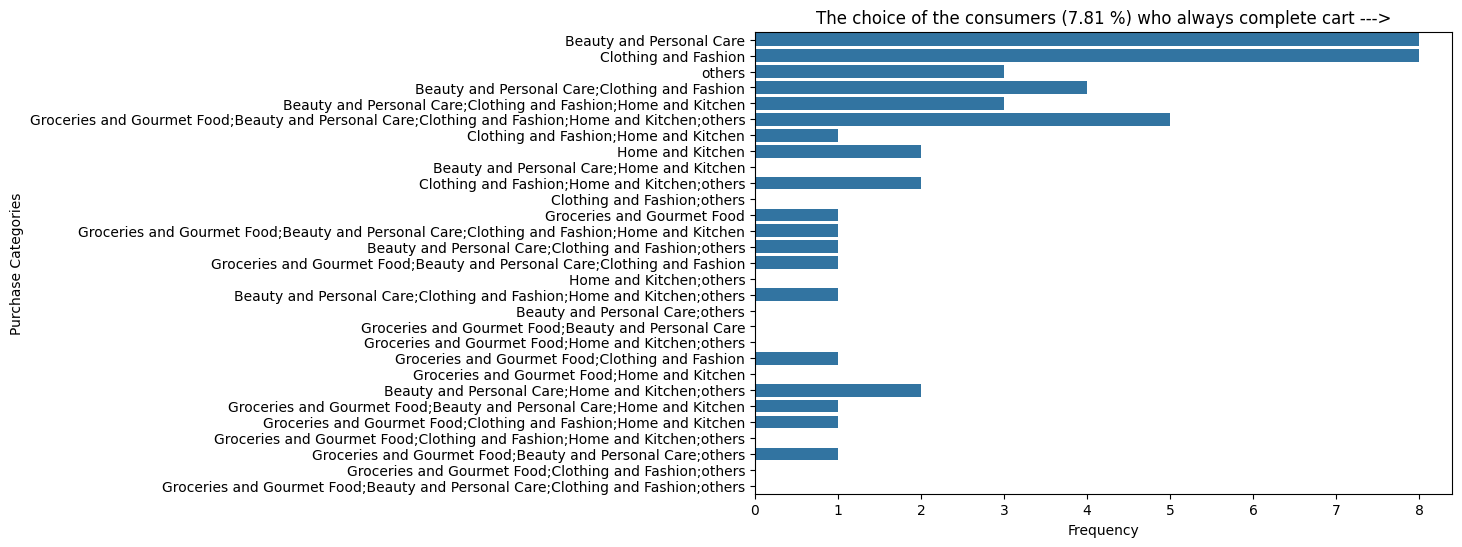

In [45]:
plt.figure(figsize=(9,6))
sns.countplot(y='Purchase_Categories', data=data.loc[data['Cart_Completion_Frequency'] == 'Always',:], order=data['Purchase_Categories'].value_counts().index)
plt.title('The choice of the consumers (7.81 %) who always complete cart --->')
plt.xlabel('Frequency')
plt.ylabel('Purchase Categories')
plt.show()

The highest retention rates-Beauty and Personal Care' and 'Clothing and Fashion' exhibit

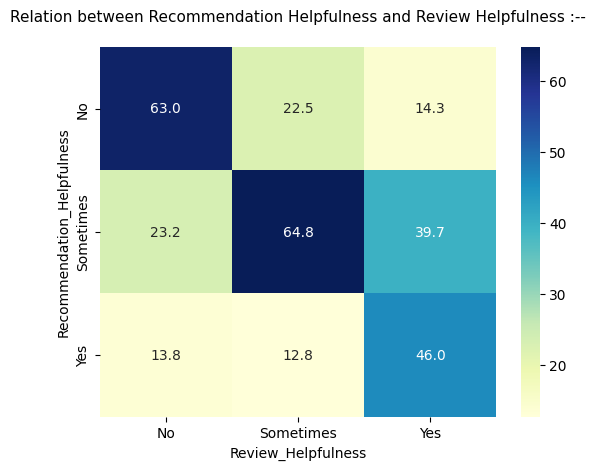

In [46]:
contingency_table = pd.crosstab(data['Recommendation_Helpfulness'], data['Review_Helpfulness'])
contingency_table_percent = contingency_table.div(contingency_table.sum(axis = 0) ,axis = 1) * 100
sns.heatmap(contingency_table_percent, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Relation between Recommendation Helpfulness and Review Helpfulness :--\n', fontdict=dict(size=11))
plt.show()

The heatmap emphasizes a correlation between Review helpfulness and Recommendation helpfulness.